In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
#load data set
data = pd.read_csv("email_phishing_data.csv")
print("----- Dataset Preview -----")
print(data.head(), "\n")
print(data.info(), "\n")
print("Null values in dataset:\n", data.isnull().sum(), "\n")
print("Dataset Shape:", data.shape, "\n")


----- Dataset Preview -----
   num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0        140                94             52          0                   0   
1          5                 5              1          0                   0   
2         34                32             15          0                   0   
3          6                 6              2          0                   0   
4          9                 9              2          0                   0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  label  
0                    0                    0                    0      0  
1                    0                    0                    0      0  
2                    0                    0                    0      0  
3                    0                    0                    0      0  
4                    0                    0                    0      0   

<class 'pandas.core.frame.DataFrame'>
RangeIn

Class Distribution:
 label
0    517897
1      6949
Name: count, dtype: int64


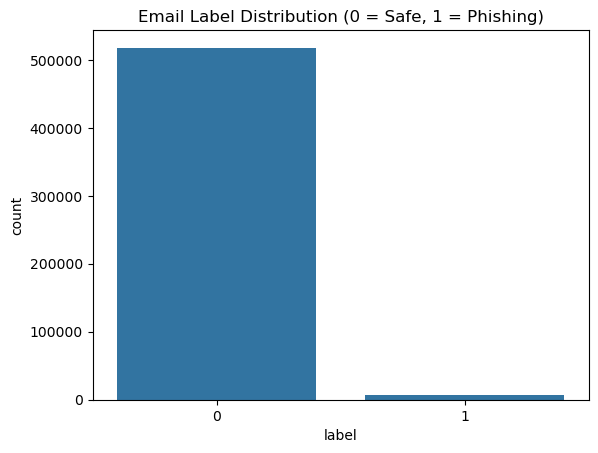

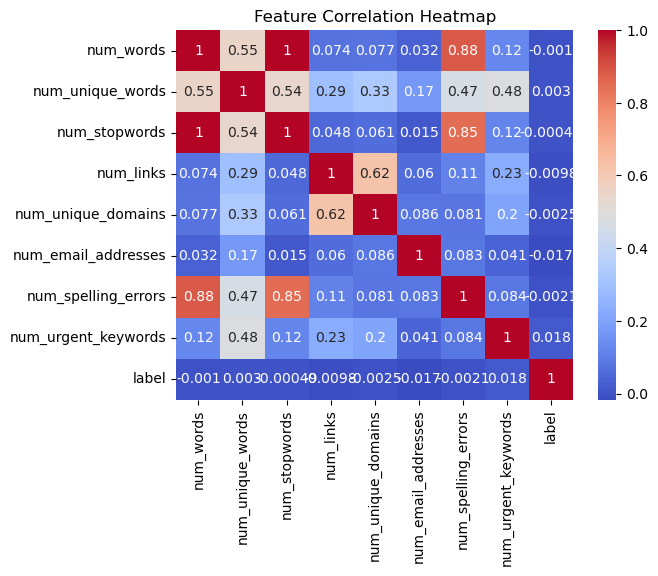

In [12]:
#Exploratory Data Analysis (EDA)
print("Class Distribution:\n", data['label'].value_counts())
sns.countplot(x='label', data=data)
plt.title("Email Label Distribution (0 = Safe, 1 = Phishing)")
plt.show()

# Correlation heatmap for numeric features
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
#Preprocessing
X = data.drop(columns=['label'])
y = data['label']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y )

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0], "\n")


Training Samples: 419876
Testing Samples: 104970 



In [14]:
#train models
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Model 2: Gaussian Naive Bayes (for numeric data)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [15]:
#Evaluate Models
# Logistic Regression
lr_predictions = lr_model.predict(X_test)
print("----- Logistic Regression Performance -----")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions), "\n")

# Naive Bayes
nb_predictions = nb_model.predict(X_test)
print("----- Gaussian Naive Bayes Performance -----")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions), "\n")


----- Logistic Regression Performance -----
Accuracy: 0.9867676478993999
Confusion Matrix:
 [[103580      0]
 [  1389      1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    103580
           1       1.00      0.00      0.00      1390

    accuracy                           0.99    104970
   macro avg       0.99      0.50      0.50    104970
weighted avg       0.99      0.99      0.98    104970
 

----- Gaussian Naive Bayes Performance -----
Accuracy: 0.15738782509288368
Confusion Matrix:
 [[15199 88381]
 [   68  1322]]
              precision    recall  f1-score   support

           0       1.00      0.15      0.26    103580
           1       0.01      0.95      0.03      1390

    accuracy                           0.16    104970
   macro avg       0.51      0.55      0.14    104970
weighted avg       0.98      0.16      0.25    104970
 



In [16]:
#Predict for a New Email
# Example: [num_words, num_unique_words, num_stopwords, num_links, 
#           num_unique_domains, num_email_addresses, num_spelling_errors, num_urgent_keywords]
new_email_features = [[50, 40, 10, 2, 1, 0, 3, 1]]  # Example numeric input

prediction = lr_model.predict(new_email_features)
print("Prediction for new email:", "Phishing" if prediction[0] == 1 else "Safe")


Prediction for new email: Safe


E:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
